<a href="https://colab.research.google.com/github/srt3000/CE888/blob/Lab_6/Lab_6/Lab_6_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To classify the countries based on the development, I have classified them based on the GDP and Inflation because, The GDP per capita is calculated as the Total GDP divided by the total population and Inflation is the measurement of the annual growth rate of the Total GDP

In [ ]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt 


In [ ]:
#import the dataset 
df = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv', header=0, index_col=None)
df.head(8)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900


In [ ]:
#split data to x and y 
x = df.iloc[:, 1:10]
y = df.iloc[:, 0:1]
print(x)
print(y)

     child_mort  exports  health  ...  life_expec  total_fer   gdpp
0          90.2     10.0    7.58  ...        56.2       5.82    553
1          16.6     28.0    6.55  ...        76.3       1.65   4090
2          27.3     38.4    4.17  ...        76.5       2.89   4460
3         119.0     62.3    2.85  ...        60.1       6.16   3530
4          10.3     45.5    6.03  ...        76.8       2.13  12200
..          ...      ...     ...  ...         ...        ...    ...
162        29.2     46.6    5.25  ...        63.0       3.50   2970
163        17.1     28.5    4.91  ...        75.4       2.47  13500
164        23.3     72.0    6.84  ...        73.1       1.95   1310
165        56.3     30.0    5.18  ...        67.5       4.67   1310
166        83.1     37.0    5.89  ...        52.0       5.40   1460

[167 rows x 9 columns]
                 country
0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
..        

We are classifying into 3 , So the no of clusters = 3,
K-Means model is made with 3 clusters

In [ ]:
kmeans_model = cluster.KMeans(n_clusters=3)
kmeans_model.fit(x)
print(kmeans_model.labels_)


[0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 0 0 0 0 2 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 2
 2 2 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2
 2 0 0 1 2 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 0 0 0 0 2 1 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0]


Plot of the cluster

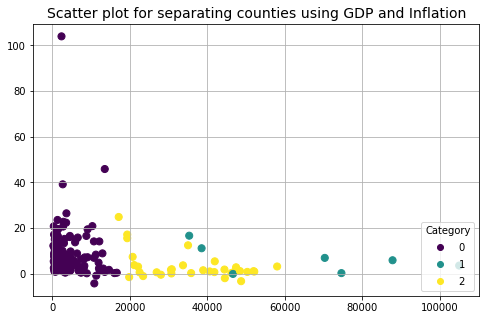

In [ ]:
# 0 - under-developing country
# 1 - developing country
# 2 - developed country
plt.figure(figsize=(8,5))
plt.title("Scatter plot for separating counties using GDP and Inflation", fontsize=14)
plt.grid(True)

scatter = plt.scatter(x['gdpp'],x['inflation'],c=kmeans_model.labels_,cmap='viridis',s=50)
plt.legend(*scatter.legend_elements(), loc="lower right", title="Category")
plt.show()

Create a copy of the data see the number of countries classified to under developed, developing and developed

In [ ]:
data = df.copy()
data['label'] = kmeans_model.labels_
data['label'].value_counts()

0    128
2     32
1      7
Name: label, dtype: int64

Change the genereated labels "0,1,2" to 'under-developing country', 'developing country', 'developed country'.

In [ ]:
data[['label']] = data['label'].replace([0,1,2], ['under-developing country', 'developing country', 'developed country'])



In [ ]:
print(data)

                 country  child_mort  ...   gdpp                     label
0            Afghanistan        90.2  ...    553  under-developing country
1                Albania        16.6  ...   4090  under-developing country
2                Algeria        27.3  ...   4460  under-developing country
3                 Angola       119.0  ...   3530  under-developing country
4    Antigua and Barbuda        10.3  ...  12200  under-developing country
..                   ...         ...  ...    ...                       ...
162              Vanuatu        29.2  ...   2970  under-developing country
163            Venezuela        17.1  ...  13500  under-developing country
164              Vietnam        23.3  ...   1310  under-developing country
165                Yemen        56.3  ...   1310  under-developing country
166               Zambia        83.1  ...   1460  under-developing country

[167 rows x 11 columns]
